In [575]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder

pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None
%matplotlib inline

In [576]:
def fix_time(df):
    time = []
    date_fx = []
    months = {"Jan": 1, "Feb": 2, "Mar": 3,
              "Apr": 4, "May": 5, "Jun": 6,
              "Jul": 7, "Aug": 8, "Sep": 9,
              "Oct": 10, "Nov": 11, "Dec": 12
             }
    for date in df["date"]:
        mas = date.split()
        date_fx.append(datetime.date(int(mas[2][:-1]), months[mas[1]], int(mas[0])))
        podmas = mas[-1].split(":")
        time.append(datetime.time(int(podmas[0]), int(podmas[1]), 0))
    df["time"] = time
    df["date"] = date_fx
    
    
def fix_names1(players): ## Как то улучшить?
    arr = []
    for x in players['name']:
        surname = ''
        tmp = x.split(' ')
        if len(tmp) > 1:
            surname = tmp[-1]
            name = tmp[0][0] + '.'
            arr.append(surname + " " + name)
        else:
            arr.append(None)
    players['name'] = arr
    
def fix_names2(players): ## Как то улучшить?
    arr = []
    for x in players['name']:
        surname = ''
        tmp = x.split(' ')
        if len(tmp) > 1:
            surname = " ".join(tmp[1:])
            name = tmp[0][0] + '.'
            arr.append(surname + " " + name)
        else:
            arr.append(None)
    players['name'] = arr

def add_stats(df, players, set_):
    df['height_player1'] = [None for x in range(len(df))]
    df['birth_date_player1'] = [None for x in range(len(df))]
    df['hand_player1'] = [None for x in range(len(df))]
    df['rank_player1'] = [None for x in range(len(df))]
    df['nationality_player1'] = [None for x in range(len(df))]
    df['height_player2'] = [None for x in range(len(df))]
    df['birth_date_player2'] = [None for x in range(len(df))]
    df['hand_player2'] = [None for x in range(len(df))]
    df['rank_player2'] = [None for x in range(len(df))]
    df['nationality_player2'] = [None for x in range(len(df))]
    arr1_player1 = []
    arr1_player2 = []
    arr2_player1 = []
    arr2_player2 = []
    arr3_player1 = []
    arr3_player2 = []
    arr4_player1 = []
    arr4_player2 = []
    arr5_player1 = []
    arr5_player2 = []
    for i in range(len(df)):
        try:
            player1 = players[df['player1'][i]:].head(1)
            arr1_player1.append(player1['height'][0])
            arr2_player1.append(player1['birth_date'][0])
            arr4_player1.append(player1['hand'][0])
            arr5_player1.append(player1['rank'][0])
            arr3_player1.append(player1['nationality'][0])
        except Exception:
            arr1_player1.append(df['height_player1'][i])
            arr2_player1.append(df['birth_date_player1'][i])
            arr3_player1.append(df['hand_player1'][i])
            arr4_player1.append(df['rank_player1'][i])
            arr5_player1.append(df['nationality_player1'][i])
            set_.add(df['player1'][i])
            
        try:
            player2 = players[df['player2'][i]:].head(1)
            arr1_player2.append(player2['height'][0])
            arr2_player2.append(player2['birth_date'][0])
            arr4_player2.append(player2['hand'][0])
            arr5_player2.append(player2['rank'][0])
            arr3_player2.append(player2['nationality'][0])
        except Exception:
            arr1_player2.append(df['height_player2'][i])
            arr2_player2.append(df['birth_date_player2'][i])
            arr3_player2.append(df['hand_player2'][i])
            arr4_player2.append(df['rank_player2'][i])
            arr5_player2.append(df['nationality_player2'][i])
            set_.add(df['player2'][i])
            
    df['height_player1'] = arr1_player1
    df['height_player2'] = arr1_player2
    df['age_player1'] = arr2_player1
    df['age_player2'] = arr2_player2
    df['nationality_player1'] = arr3_player1
    df['nationality_player2'] = arr3_player2
    df['hand_player1'] = arr4_player1
    df['hand_player2'] = arr4_player2
    df['rank_player1'] = arr5_player1
    df['rank_player2'] = arr5_player2
    
def fix_age(df, player_num):
    time = []
    date_fx = []
    months = {"Jan": 1, "Feb": 2, "Mar": 3,
              "Apr": 4, "May": 5, "Jun": 6,
              "Jul": 7, "Aug": 8, "Sep": 9,
              "Oct": 10, "Nov": 11, "Dec": 12
             }
    for date in df["age_player" + str(player_num)]:
        if type(date) != float and date != None:
            mas = date.split()
            date_fx.append(datetime.date(int(mas[-1]), months[mas[1]], int(mas[0])))
        else:
            date_fx.append(None)
    df["age_player" + str(player_num)] = date_fx

def invert_dataframe(df):
    for x in df.keys():
        if ('player1' in x or x == 'k1') and x != 'player1_win':
            name2 = x[:-1] + '2'
            tmp = df[x].copy()
            df[x]= df[name2]
            df[name2] = tmp
    for i in range(len(df)):
        if df['player1_win'][i] == 1:
            df['player1_win'][i] = 0
        else:
            df['player1_win'][i] = 1

In [602]:
df = pd.read_pickle('matches.pkl')
players1 = pd.read_pickle('players.pkl')
players2 = pd.read_pickle('players.pkl')
fix_time(df)
fix_names1(players1)
fix_names2(players2)
players1 = players1.set_index(['name'])
players2 = players2.set_index(['name'])
set1_ = set()
set2_ = set()
add_stats(df, players1, set1_)
add_stats(df, players2, set2_)
fix_age(df, 1)
fix_age(df, 2)
df['date'] = pd.to_datetime(df['date'])
df['age_player1'] = pd.to_datetime(df['age_player1'])
df['age_player2'] = pd.to_datetime(df['age_player2'])
df_copy = df.copy()
invert_dataframe(df_copy)
df = df.set_index(["player1", "player2"])
df_copy = df_copy.set_index(["player1", "player2"])
df = df.append(df_copy)
df = df.set_index(['date', 'player1', 'player2'])
print(df.shape)
df.head(3)


(52060, 230)


match_url  \
date       player1      player2                                                           
2014-01-01 Matosević M. Querrey S.    https://www.sofascore.com/matosevic-querrey/bg...   
           Dimitrov G.  Čilić M.       https://www.sofascore.com/dimitrov-cilic/MhgsGwj   
           Ebden M.     Nishikori K.  https://www.sofascore.com/ebden-nishikori/IogsjDg   

                                     status            Surface  k1  k2  \
date       player1      player2                                          
2014-01-01 Matosević M. Querrey S.    Ended  Hardcourt outdoor NaN NaN   
           Dimitrov G.  Čilić M.      Ended  Hardcourt outdoor NaN NaN   
           Ebden M.     Nishikori K.  Ended  Hardcourt outdoor NaN NaN   

                                      player1_win  round match_duration_mnt  \
date       player1      player2                                               
2014-01-01 Matosević M. Querrey S.              1  (R16)                NaN   
           Dimitrov G.  Čilić M.                0  (R16)                NaN   
           Ebden M.     Nishikori K.            0  (R16)                NaN   

                                     Location  duration_set1  duration_set2  \
date       player1      player2                                               
2014-01-01 Matosević M. Querrey S.        NaN            NaN            NaN   
           Dimitrov G.  Čilić M.          NaN            NaN            NaN   
           Ebden M.     Nishikori K.      NaN            NaN            NaN   

                                      duration_set3  duration_set4  \
date       player1      player2                                      
2014-01-01 Matosević M. Querrey S.              NaN            NaN   
           Dimitrov G.  Čilić M.                NaN            NaN   
           Ebden M.     Nishikori K.            NaN            NaN   

                                      duration_set5  aces_match_player1  \
date       player1      player2                                           
2014-01-01 Matosević M. Querrey S.              NaN                 NaN   
           Dimitrov G.  Čilić M.                NaN                 NaN   
           Ebden M.     Nishikori K.            NaN                 NaN   

                                      aces_match_player2  \
date       player1      player2                            
2014-01-01 Matosević M. Querrey S.                   NaN   
           Dimitrov G.  Čilić M.                     NaN   
           Ebden M.     Nishikori K.                 NaN   

                                      double_faults_match_player1  \
date       player1      player2                                     
2014-01-01 Matosević M. Querrey S.                            NaN   
           Dimitrov G.  Čilić M.                              NaN   
           Ebden M.     Nishikori K.                          NaN   

                                      double_faults_match_player2  \
date       player1      player2                                     
2014-01-01 Matosević M. Querrey S.                            NaN   
           Dimitrov G.  Čilić M.                              NaN   
           Ebden M.     Nishikori K.                          NaN   

                                      first_serve_prc_match_player1  \
date       player1      player2                                       
2014-01-01 Matosević M. Querrey S.                              NaN   
           Dimitrov G.  Čilić M.                                NaN   
           Ebden M.     Nishikori K.                            NaN   

                                      first_serve_prc_match_player2  \
date       player1      player2                                       
2014-01-01 Matosević M. Querrey S.                              NaN   
           Dimitrov G.  Čilić M.                                NaN   
           Ebden M.     Nishikori K.                            NaN   

                           

In [612]:
## Убираем матчи, в которых неизвестны данные параметры
df = df.dropna(subset=['height_player1'])
df = df.dropna(subset=['height_player2'])
df = df.dropna(subset=['age_player1'])
df = df.dropna(subset=['age_player2'])
df = df.dropna(subset=['k1'])
df = df.dropna(subset=['k2'])

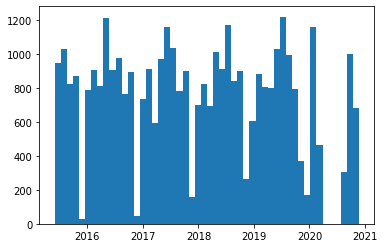

In [613]:
plt.hist(df.index.get_level_values('date'), bins=50);

In [614]:
df['p1_age'] = (df.index.get_level_values('date') - df['age_player1']).dt.days / 365
df['p2_age'] = (df.index.get_level_values('date') - df['age_player2']).dt.days / 365

In [615]:
df['p1_birthday_today'] = \
    (df['age_player1'].dt.month == df.index.get_level_values('date').month) & \
    (df['age_player2'].dt.day == df.index.get_level_values('date').day)

df['p2_birthday_today'] = \
    (df['age_player1'].dt.month == df.index.get_level_values('date').month) & \
    (df['age_player2'].dt.day == df.index.get_level_values('date').day)

In [616]:
df['hour'] = df['time'].map(lambda x: x.hour)

In [617]:
df['Surface'] = df['Surface'].fillna('N/A')

surface_encoder = OrdinalEncoder()
df['Surface'] = surface_encoder.fit_transform(df['Surface'].values.reshape(-1,1)); ## Clay - 0.0, Grass - 1.0, Hard outdoor - 3.0, Hard court indoor - 2.0 

In [618]:
df['round'] = df['round'].fillna('N/A')

round_encoder = OrdinalEncoder()
df['round'] = round_encoder.fit_transform(df['round'].values.reshape(-1,1));

In [619]:
features_from = '2014-01-01'

cols2keep = [
    'Surface', 'round', 'hour', 'player1_win',
    'p1_age', 'p2_age', 'k1', 'k2', 'height_player1', 'height_player2',
    'p1_birthday_today', 'p2_birthday_today'
     
]

data = df.loc[df.index.get_level_values('date') > features_from, cols2keep] \
    .dropna(subset=['player1_win'])

print(data.shape[0])
data.head(10)

36814


Surface  round  hour  player1_win  \
date       player1      player2                                          
2015-06-01 Murray A.    Chardy J.        0.0    1.0    13            1   
           Sock J.      Nadal R.         0.0    1.0    17            0   
           Djokovic N.  Gasquet R.       0.0    1.0    18            1   
2015-06-02 Nishikori K. Tsonga J.        0.0   25.0    16            0   
           Wawrinka S.  Federer R.       0.0   25.0    17            1   
2015-06-03 Djokovic N.  Nadal R.         0.0   25.0    16            1   
           Murray A.    Ferrer D.        0.0   25.0    17            1   
2015-06-05 Tsonga J.    Wawrinka S.      0.0   28.0    14            0   
           Djokovic N.  Murray A.        0.0   28.0    18            1   
2015-06-06 Ito T.       Sels J.          1.0   23.0    11            1   

                                        p1_age     p2_age    k1     k2  \
date       player1      player2                                          
2015-06-01 Murray A.    Chardy J.    28.065753  28.317808  1.08   8.00   
           Sock J.      Nadal R.     22.698630  29.013699  9.00   1.07   
           Djokovic N.  Gasquet R.   28.046575  28.972603  1.00  19.00   
2015-06-02 Nishikori K. Tsonga J.    25.441096  30.145205  1.29   3.75   
           Wawrinka S.  Federer R.   30.200000  33.838356  2.75   1.44   
2015-06-03 Djokovic N.  Nadal R.     28.052055  29.019178  1.33   3.40   
           Murray A.    Ferrer D.    28.071233  33.191781  1.53   2.50   
2015-06-05 Tsonga J.    Wawrinka S.  30.153425  30.208219  2.75   1.44   
           Djokovic N.  Murray A.    28.057534  28.076712  1.17   5.00   
2015-06-06 Ito T.       Sels J.      27.068493  19.835616  1.00  10.00   

                                     height_player1  height_player2  \
date       player1      player2                                       
2015-06-01 Murray A.    Chardy J.              1.91            1.88   
           Sock J.      Nadal R.               1.91            1.85   
           Djokovic N.  Gasquet R.             1.88            1.83   
2015-06-02 Nishikori K. Tsonga J.              1.78            1.88   
           Wawrinka S.  Federer R.             1.83            1.85   
2015-06-03 Djokovic N.  Nadal R.               1.88            1.85   
           Murray A.    Ferrer D.              1.91            1.75   
2015-06-05 Tsonga J.    Wawrinka S.            1.88            1.83   
           Djokovic N.  Murray A.              1.88            1.91   
2015-06-06 Ito T.       Sels J.                1.80            1.88   

                                     p1_birthday_today  p2_birthday_today  
date       player1      player2                                            
2015-06-01 Murray A.    Chardy J.                False              False  
           Sock J.      Nadal R.                 False              False  
           Djokovic N.  Gasquet R.               False              False  
2015-06-02 Nishikori K. Tsonga J.                False              False  
           Wawrinka S.  Federer R.               False              False  
2015-06-03 Djokovic N.  Nadal R.                 False              False  
           Murray A.    Ferrer D.                False              False  
2015-06-05 Tsonga J.    Wawrinka S.              False              False  
           Djokovic N.  Murray A.                False              False  
2015-06-06 Ito T.       Sels J.                  False              False

In [ ]:
## Информация о players:
## 148 players len(name + surname) > 2
## 1217 players len(name + surname) == 2
## 11 countries, not players
## Идея: сначала сделать fix_name по принципу: берем последнее слово из player1.split() в качестве фамилии, а затем fix_name:
## берем все слова с первого из player1.split() в качестве фамилии
## Итог: Выкинуто 50 игроков и их матчи(почти все малоизвестные)

In [ ]:
## НЕПРИЯТНО: у 6к матчей нет k1 k2(матчи в 2014) - по сути дроп всех матчей 2014 года

In [620]:
data.to_pickle("train.pkl")

In [624]:
data = data.reset_index()

In [625]:
data = data.set_index(["player1", "player2"])

In [626]:
data.date = pd.to_datetime(data.date, format='%d.%m.%Y')

In [627]:
data.head(1)

,,date,Surface,round,hour,player1_win,p1_age,p2_age,k1,k2,height_player1,height_player2,p1_birthday_today,p2_birthday_today
player1,player2,,,,,,,,,,,,,
Murray A.,Chardy J.,2015-06-01,0.0,1.0,13,1,28.065753,28.317808,1.08,8.0,1.91,1.88,False,False


In [ ]:
def lagged_features(lagged_features(df = train_set,
, target_var = [aces_player1, aces_player1]
, lags = [1]
, windows = [28]
, aggregation_methods = {'mean'}
, surface_type_filter = [-1]):
                    filter_mapping = {0:'n', 1:'o', 2:'a'}
    
    # loop by filter variables and window
    for p, d, w in product(promo_filters, deficit_filters, windows):

        # define approproate dates for each SKU and Store pairs        
        p_idx = d_idx = df.index 
        if p <2:
            p_idx = df.Promo == p
        if d <2:
            p_idx = df.Deficit == d 

        # check whether filtered df in not empty
        if len(df[p_idx&d_idx].index)>0:
            
            # lagged features calculation
            lf_df = df[p_idx&d_idx].set_index(['SKU_id', 'Store_id', 'Date']).\
                 Demand.groupby(level=['SKU_id', 'Store_id']).apply(lambda x: x.rolling(window=w, min_periods = 1).agg(aggregation_methods))

#           # provide lags tranformations
            for l in lags:
                new_names = {x: "lag{0}_wdw{1}_{2}_{3}prm_{4}dfc".
                              format(14, 7, x, filter_mapping[1],filter_mapping[0]) for x in lf_df.columns }

                df = df.merge(lf_df.shift(l).reset_index().rename(columns = new_names),
                    how='left', on =['SKU_id', 'Store_id', 'Date'] )

    return df

In [628]:
df

match_url  \
date       player1        player2                                                          
2015-06-01 Murray A.      Chardy J.      https://www.sofascore.com/chardy-murray/BcgsEqg   
           Sock J.        Nadal R.          https://www.sofascore.com/sock-nadal/LOfswCq   
           Djokovic N.    Gasquet R.   https://www.sofascore.com/djokovic-gasquet/oNf...   
2015-06-02 Nishikori K.   Tsonga J.    https://www.sofascore.com/nishikori-tsonga/Pbg...   
           Wawrinka S.    Federer R.   https://www.sofascore.com/wawrinka-federer/RLf...   
...                                                                                  ...   
2020-11-20 Zverev A.      Djokovic N.  https://www.sofascore.com/zverev-djokovic/HXfsnTx   
           Schwartzman D. Medvedev D.  https://www.sofascore.com/schwartzman-medvedev...   
2020-11-21 Djokovic N.    Thiem D.      https://www.sofascore.com/thiem-djokovic/HXfsYzr   
           Nadal R.       Medvedev D.  https://www.sofascore.com/medvedev-nadal/LOfsevpb   
2020-11-22 Thiem D.       Medvedev D.  https://www.sofascore.com/thiem-medvedev/Yzrsevpb   

                                      status  Surface    k1     k2  \
date       player1        player2                                    
2015-06-01 Murray A.      Chardy J.    Ended      0.0  1.08   8.00   
           Sock J.        Nadal R.     Ended      0.0  9.00   1.07   
           Djokovic N.    Gasquet R.   Ended      0.0  1.00  19.00   
2015-06-02 Nishikori K.   Tsonga J.    Ended      0.0  1.29   3.75   
           Wawrinka S.    Federer R.   Ended      0.0  2.75   1.44   
...                                      ...      ...   ...    ...   
2020-11-20 Zverev A.      Djokovic N.  Ended      2.0  3.40   1.33   
           Schwartzman D. Medvedev D.  Ended      2.0  3.75   1.28   
2020-11-21 Djokovic N.    Thiem D.     Ended      2.0  1.57   2.37   
           Nadal R.       Medvedev D.  Ended      2.0  2.10   1.72   
2020-11-22 Thiem D.       Medvedev D.  Ended      2.0  2.20   1.66   

                                       player1_win  round match_duration_mnt  \
date       player1        player2                                              
2015-06-01 Murray A.      Chardy J.              1    1.0                173   
           Sock J.        Nadal R.               0    1.0                173   
           Djokovic N.    Gasquet R.             1    1.0                121   
2015-06-02 Nishikori K.   Tsonga J.              0   25.0                241   
           Wawrinka S.    Federer R.             1   25.0                130   
...                                            ...    ...                ...   
2020-11-20 Zverev A.      Djokovic N.            0    9.0                 96   
           Schwartzman D. Medvedev D.            0    9.0                 74   
2020-11-21 Djokovic N.    Thiem D.               0   28.0                174   
           Nadal R.       Medvedev D.            0   28.0                155   
2020-11-22 Thiem D.       Medvedev D.            0   16.0                162   

                                      Location  duration_set1  duration_set2  \
date       player1        player2                                              
2015-06-01 Murray A.      Chardy J.        NaN           39.0           50.0   
           Sock J.        Nadal R.         NaN           42.0           31.0   
           Djokovic N.    Gasquet R.       NaN           38.0           39.0   
2015-06-02 Nishikori K.   Tsonga J.        NaN           32.0           73.0   
           Wawrinka S.    Federer R.       NaN           46.0           34.0   
...                                        ...            ...            ...   
2020-11-20 Zverev A.      Djokovic N.  London            33.0           63.0   
           Schwartzman D. Medvedev D.  London            37.0           37.0   
2020-11-21 Djokovic N.    Thiem D.     London            51.0           66.0   
           Nadal R.       Medvedev D.  London     